In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv('/content/AMZNtrain.csv',parse_dates=['Date'],index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [6]:
xtrain = df[['Open']]
xtrain.shape

(1258, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
mnc = MinMaxScaler()
mnc_xtrain = mnc.fit_transform(xtrain)
mnc_xtrain.shape

(1258, 1)

In [8]:
def feature_selection(n_steps,data):
  x = []
  y = []
  for i in range(n_steps,len(data)):
    x.append(data[i-n_steps:i,0])
    y.append(data[i,0])
  return np.array(x),np.array(y)


In [12]:
n_steps = 15
x_train, y_train = feature_selection(n_steps,mnc_xtrain)
x_train.shape,y_train.shape

((1243, 15), (1243,))

In [13]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(1243, 15, 1)

In [ ]:
# GRU Model

In [63]:
from keras.models import Sequential
from keras.layers import GRU,Dense
model = Sequential()
model.add(GRU(100,activation = 'relu',input_shape = (n_steps,1)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 100)               30900     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [64]:
history = model.fit(x_train,y_train,epochs=100,batch_size=12)

Epoch 1/100
104/104 [==============================] - 2s 9ms/step - loss: 0.0379
Epoch 2/100
104/104 [==============================] - 1s 10ms/step - loss: 2.5639e-04
Epoch 3/100
104/104 [==============================] - 1s 10ms/step - loss: 2.5246e-04
Epoch 4/100
104/104 [==============================] - 1s 10ms/step - loss: 2.4791e-04
Epoch 5/100
104/104 [==============================] - 1s 10ms/step - loss: 2.1858e-04
Epoch 6/100
104/104 [==============================] - 1s 10ms/step - loss: 2.5632e-04
Epoch 7/100
104/104 [==============================] - 1s 10ms/step - loss: 2.3508e-04
Epoch 8/100
104/104 [==============================] - 1s 10ms/step - loss: 1.6826e-04
Epoch 9/100
104/104 [==============================] - 1s 9ms/step - loss: 2.0089e-04
Epoch 10/100
104/104 [==============================] - 1s 10ms/step - loss: 2.0749e-04
Epoch 11/100
104/104 [==============================] - 1s 10ms/step - loss: 1.6853e-04
Epoch 12/100
104/104 [=========================

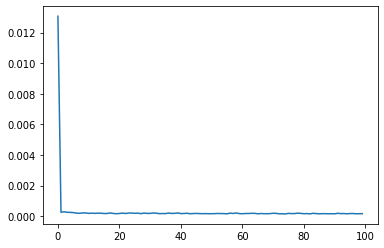

In [65]:
plt.plot(history.history['loss'])

In [66]:
test = pd.read_csv('/content/AMZNtrain.csv',parse_dates=['Date'],index_col='Date')
test.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [67]:
test.shape

(1258, 6)

In [68]:
xtest = test[['Open']]
xtest.shape

(1258, 1)

In [69]:
mnc_xtest = mnc.fit_transform(xtest)
mnc_xtest.shape

(1258, 1)

In [70]:
x_test,y_test = feature_selection(n_steps,mnc_xtest)
x_test.shape,y_test.shape

((1243, 15), (1243,))

In [71]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test.shape

(1243, 15, 1)

In [72]:
pred = model.predict(x_test)
predicted_value = mnc.inverse_transform(pred)
predicted_value

array([[ 394.68317],
       [ 391.36182],
       [ 384.30246],
       ...,
       [1377.4792 ],
       [1455.0125 ],
       [1482.6058 ]], dtype=float32)

In [73]:
actual_value = mnc.inverse_transform(y_test.reshape(-1,1))
actual_value.shape


(1243, 1)

In [74]:
result = pd.DataFrame({'Actual':list(actual_value),'Predicted':list(predicted_value)})
result

,Actual,Predicted
0,[398.160004],[394.68317]
1,[390.5],[391.36182]
2,[387.399994],[384.30246]
3,[392.160004],[380.55408]
4,[393.769989],[384.15237]
...,...,...
1238,[1346.0],[1477.099]
1239,[1368.890015],[1364.1213]
1240,[1454.199951],[1377.4792]
1241,[1473.349976],[1455.0125]


In [75]:
from sklearn.metrics import r2_score,mean_squared_error
print('mse',mean_squared_error(actual_value,predicted_value))
print('RMSE',np.sqrt(mean_squared_error(actual_value,predicted_value)))
print('r2_score',r2_score(actual_value,predicted_value))


mse 447.26392320901334
RMSE 21.148615160549245
r2_score 0.9980450406016151
